# Pregunta 2. ¿Cuál es la diferencia media de sus precios vs los precios de Carrefour y Dia?

#### ▪️ Lo primero, tenemos que conocer el promedio de los precios de cada supermercado, conocer los NaN, outliers y tratarlos. 

#### ▪️ Luego, agruparemos por supermercado y evaluaremos los precios y los precios de referencia de cada uno para ver si tienen sentido.

In [78]:
import pandas as pd
import numpy as np
import io
pd.set_option('display.float_format', lambda x: '%.2f' % x) # truco para notación cientifica
import seaborn as sns
import matplotlib.pyplot as plt

In [79]:
rd = pd.read_csv('raw_data.csv')

In [80]:
sc=pd.read_csv('Super_competitors .csv',header=0)

In [4]:
#📌📌📌📌📌📌📌📌  Imprimimos las bds para ver que formato tienen 📌📌📌📌📌📌📌📌

In [5]:
rd.head()

,category,name,description,price,reference_price,reference_unit,insert_date,product_id,id_reference_supermarket
0,perfumeria_e_higiene_cuidado_facial_protector_...,LIPOSAN protector labial soft rose envase 1 ud,NaN,2.39,2.39,ud,2021-03-06 00:00:00,45d83ce427cf60c02e1e6f3d28f58ed6,M3
1,perfumeria_e_higiene_higiene_intima_compresas,AUSONIA compresas normal alas bolsa 14 uds,NaN,2.49,0.18,ud,2021-03-06 00:00:00,3fa10738dcbe5f09646eaf39a46a2871,M3
2,perfumeria_e_higiene_higiene_intima_compresas,EVAX Cottonlike compresa super plus con alas b...,NaN,2.79,0.23,ud,2021-03-06 00:00:00,5f5bc0a466375a16d01a6aed6c66e413,M3
3,perfumeria_e_higiene_higiene_bucal_productos_p...,POLIDENT tabletas limpiadoras para prótesis de...,NaN,7.95,0.11,ud,2021-03-06 00:00:00,0a1e56be01f8766d0bb87f3e42fd2abf,M3
4,perfumeria_e_higiene_higiene_bucal_productos_p...,IWHITE kit de blanquamiento dental profesional...,NaN,36.99,3.70,ud,2021-03-06 00:00:00,b150c5e27da5c91d13a5b570c9b3efd3,M3


In [6]:
rd.describe()

,price,reference_price
count,8223974.00,8223986.00
mean,4.75,19.35
std,48.90,626.79
min,0.08,0.00
25%,1.39,1.80
50%,2.20,4.56
75%,3.99,9.92
max,7915.05,163333.33


In [7]:
sc.head(5)

,ID,Name
0,M1,Mercadona
1,M2,Carrefour
2,M3,Dia


In [8]:
#📌📌📌📌📌📌📌📌  Imprimimos las bds para ver que Tipo tienen📌📌📌📌📌📌📌📌

In [9]:
rd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8223992 entries, 0 to 8223991
Data columns (total 9 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   category                  object 
 1   name                      object 
 2   description               object 
 3   price                     float64
 4   reference_price           float64
 5   reference_unit            object 
 6   insert_date               object 
 7   product_id                object 
 8   id_reference_supermarket  object 
dtypes: float64(2), object(7)
memory usage: 564.7+ MB


In [10]:
#📌📌📌📌📌📌📌📌  Cambiamos el formato de las fechas OBJECT--> DATE 📌📌📌📌📌📌📌📌

In [11]:
#⚡⚡⚡ Para la bd "rd" ⚡⚡⚡

In [12]:
rd['insert_date'] = pd.to_datetime(rd['insert_date'], errors='coerce')

In [13]:
rd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8223992 entries, 0 to 8223991
Data columns (total 9 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   category                  object        
 1   name                      object        
 2   description               object        
 3   price                     float64       
 4   reference_price           float64       
 5   reference_unit            object        
 6   insert_date               datetime64[ns]
 7   product_id                object        
 8   id_reference_supermarket  object        
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 564.7+ MB


In [14]:
#📌📌📌📌📌📌📌📌 Verificamos si hay NaN en el Data Frame 📌📌📌📌📌📌📌📌

In [15]:
rd.isnull().values.any()

True

In [16]:
#⚡⚡⚡¿Cuántos valores NaN hay en el data frame rd?⚡⚡⚡

In [17]:
rd.isnull().sum() 

category                          0
name                             98
description                 5201517
price                            18
reference_price                   6
reference_unit                 5480
insert_date                       0
product_id                        0
id_reference_supermarket          0
dtype: int64

In [18]:
 NaN_price= rd[rd['price'].isna()]  #vemos los 18 articulos que no tienen precio
 print([i for i in NaN_price["name"]])

['Limón a granel 1 Kg aprox', 'DIA margarina ligera barqueta 500 gr', 'BISCUITS GALICIA mini magdalenas con mantequilla bolsa 180 gr', 'DIA SELECCIÓN MUNDIAL tortiglioni paquete 500 gr', 'DIA margarina ligera barqueta 500 gr', 'DIA SELECCIÓN MUNDIAL tortiglioni paquete 500 gr', 'BISCUITS GALICIA mini magdalenas con mantequilla bolsa 180 gr', "Ginebra Gordon's 1 l.", 'Whisky Jameson irlandés 70 cl.', 'Whisky Jameson irlandés 70 cl.', 'Whisky Jameson irlandés 70 cl.', 'Whisky Jameson irlandés 70 cl.', 'Whisky Jameson irlandés 70 cl.', 'Whisky Jameson irlandés 70 cl.', 'Whisky Jameson irlandés 70 cl.', 'Whisky Jameson irlandés 70 cl.', 'Whisky Jameson irlandés 70 cl.', 'Whisky Jameson irlandés 70 cl.']


In [19]:
NaN_rp= rd[rd['reference_price'].isna()]    #vemos los 6 articulos que no tienen reference_price
print([i for i in NaN_rp["name"]])

['DIA margarina ligera barqueta 500 gr', 'BISCUITS GALICIA mini magdalenas con mantequilla bolsa 180 gr', 'DIA SELECCIÓN MUNDIAL tortiglioni paquete 500 gr', 'DIA margarina ligera barqueta 500 gr', 'DIA SELECCIÓN MUNDIAL tortiglioni paquete 500 gr', 'BISCUITS GALICIA mini magdalenas con mantequilla bolsa 180 gr']


# Conclusión de los valores NaN
 A pesar de que hay valores NaN , para los datos que necesitamos, (precios, reference_price) en función a la proporción de la base datos que cuenta con 8.223.992 registros **ESTOS VALORES NO TENDRÁN GRAN IMPACTO EN NUESTRO ANÁLISIS** 

In [20]:
#📌📌📌📌📌📌📌📌cuántas filas diferentes hay disponibles en cada grupo📌📌📌📌📌📌📌📌

rd.groupby("id_reference_supermarket").size()

id_reference_supermarket
M1    3329440
M2    1693583
M3    3200969
dtype: int64

In [21]:
rd_filtro_m= rd[(rd["id_reference_supermarket"] == "M1")]     #filtro por mercadona
rd_filtro_m.head(3)

,category,name,description,price,reference_price,reference_unit,insert_date,product_id,id_reference_supermarket
1055,agua_y_refrescos_isotonico_y_energetico,Bebida para deportistas sabor cítrico Hacendado,Botella,0.85,0.57,l,2021-03-06,cc6af45cd819ddd9c69c7a574b840e29,M1
1056,agua_y_refrescos_isotonico_y_energetico,Bebida para deportistas sabor cítrico Hacendado,Pack-6,1.92,0.97,l,2021-03-06,f6a62a8c304a0e818f869aa2ea02df8a,M1
1057,agua_y_refrescos_isotonico_y_energetico,Bebida para deportistas sabor cítrico Hacendado,Lata,0.32,0.97,l,2021-03-06,90361e7447fa2d5d4ea757b57d4e6a64,M1


In [22]:
rd_filtro_c= rd[(rd["id_reference_supermarket"] == "M2")]   #filtro por carrefour
rd_filtro_c.head(3)

,category,name,description,price,reference_price,reference_unit,insert_date,product_id,id_reference_supermarket
2053,bebidas_vinos_rosado,Muga Rosado 2019,NaN,9.15,9.15,ud,2021-03-06,4a9bb57a9ebbad18dff028c702d70c0e,M2
2054,bebidas_vinos_blanco,Blanc Pescador Espumoso Blanco,NaN,3.99,3.99,ud,2021-03-06,e2edfbb48927c755131eab0016995453,M2
2055,bebidas_alcoholes_ron,Ron Brugal añejo superior 70 cl.,NaN,13.80,19.71,l,2021-03-06,e86bfe04af8fdab975a3ac9a86276e3f,M2


In [23]:
rd_filtro_d= rd[(rd["id_reference_supermarket"] == "M3")]   #filtro por dia
rd_filtro_d.head(3)

,category,name,description,price,reference_price,reference_unit,insert_date,product_id,id_reference_supermarket
0,perfumeria_e_higiene_cuidado_facial_protector_...,LIPOSAN protector labial soft rose envase 1 ud,NaN,2.39,2.39,ud,2021-03-06,45d83ce427cf60c02e1e6f3d28f58ed6,M3
1,perfumeria_e_higiene_higiene_intima_compresas,AUSONIA compresas normal alas bolsa 14 uds,NaN,2.49,0.18,ud,2021-03-06,3fa10738dcbe5f09646eaf39a46a2871,M3
2,perfumeria_e_higiene_higiene_intima_compresas,EVAX Cottonlike compresa super plus con alas b...,NaN,2.79,0.23,ud,2021-03-06,5f5bc0a466375a16d01a6aed6c66e413,M3


In [24]:
#📌📌📌📌📌📌📌📌observamos por precio_referencia 📌📌📌📌📌📌📌📌
display(rd_filtro_m.sort_values(by="reference_price",ascending=False).head(2))
display(rd_filtro_c.sort_values(by="reference_price",ascending=False).head(2))
display(rd_filtro_d.sort_values(by="reference_price",ascending=False).head(2))

,category,name,description,price,reference_price,reference_unit,insert_date,product_id,id_reference_supermarket
5654822,aceite_especias_y_salsas_especias,Azafrán hebra Hacendado,Paquete,1.75,472.97,100g,2022-03-18,1db0aed2d8e3f844521ff0282c12e9bc,M1
6251550,aceite_especias_y_salsas_especias,Azafrán hebra Hacendado,Paquete,1.75,472.97,100g,2022-04-28,1db0aed2d8e3f844521ff0282c12e9bc,M1


,category,name,description,price,reference_price,reference_unit,insert_date,product_id,id_reference_supermarket
364649,limpieza_y_hogar_menaje_ollas_cazos_y_accesorios,Batería Acero Inoxidable MASTERPRO Triply 6 pzas,NaN,140.00,140000.00,ud,2021-03-24,c39e65836c869cc8f3a43e944d19a4ed,M2
324597,limpieza_y_hogar_menaje_ollas_cazos_y_accesorios,Batería Acero Inoxidable MASTERPRO Triply 6 pzas,NaN,140.00,140000.00,ud,2021-03-22,c39e65836c869cc8f3a43e944d19a4ed,M2


,category,name,description,price,reference_price,reference_unit,insert_date,product_id,id_reference_supermarket
2504733,cuidado_personal_bano_e_higiene_personal_colonias,TITTO BLUNI pack uomo colonia 75 ml + desodora...,NaN,12.25,163333.33,NaN,2021-08-12,f3a85cfa00a29b3c55016fb4a90aae4e,M3
3080601,cuidado_personal_bano_e_higiene_personal_colonias,TITTO BLUNI pack uomo colonia 75 ml + desodora...,NaN,12.25,163333.33,NaN,2021-09-22,f3a85cfa00a29b3c55016fb4a90aae4e,M3


In [25]:
#📌📌📌📌📌📌📌📌observamos por precio📌📌📌📌📌📌📌📌
display(rd_filtro_m.sort_values(by="price",ascending=False).head(2)) #MERCADONA
display(rd_filtro_c.sort_values(by="price",ascending=False).head(2)) #CARREFOUR
display(rd_filtro_d.sort_values(by="price",ascending=False).head(2)) #DIA

,category,name,description,price,reference_price,reference_unit,insert_date,product_id,id_reference_supermarket
2602298,congelados_marisco,Carabinero congelado,Granel,7915.05,79.95,kg,2021-08-19,aa8de147e283c68f9b81ba55ef8bab49,M1
2685674,congelados_marisco,Carabinero congelado,Granel,7915.05,79.95,kg,2021-08-25,aa8de147e283c68f9b81ba55ef8bab49,M1


,category,name,description,price,reference_price,reference_unit,insert_date,product_id,id_reference_supermarket
5114445,limpieza_y_hogar_bazar_barbacoas_y_accesorios,Barbacoa de Pellets - 130x55x120 Cm / 54 kg,NaN,595.00,595.00,ud,2022-02-09,07a4e9178ceb42cb5be73b99d19433ac,M2
5138241,limpieza_y_hogar_bazar_barbacoas_y_accesorios,Barbacoa Vertical con Chimena y Ladrillos Refr...,NaN,459.00,459.00,ud,2022-02-10,1fb6af387252cfee9a15c6e29a518d9f,M2


,category,name,description,price,reference_price,reference_unit,insert_date,product_id,id_reference_supermarket
4282833,frescos_charcuteria_y_quesos_curados,NOBLEZA EXTREMEÑA jamón de bellota 100% Ibéric...,NaN,289.00,38.53,kg,2021-12-14,4c51d734b50c903bc2130e9ab8f5875d,M3
6303060,frescos_charcuteria_y_quesos_curados,NOBLEZA EXTREMEÑA jamón de bellota 100% ibéric...,NaN,289.00,38.53,kg,2022-05-02,4c51d734b50c903bc2130e9ab8f5875d,M3


# Observación de los Precios vs Precios de Referencia 

* Podemos ver que hay algunos errores en los precios de referencia y los precios en algunos productos de los 3 supermercados, observamos que al ordenar los valores de forma ascendente por ambos precios, vemos que estos son bastante elevados. Ejemplo el precio del **Carabinero congelado en el Mercadona = 7915.05€** y el precio de referencia de **Azafrán hebra Hacendado =472.97€** también del Mercadona. Lo observaremos mejor con los gráficos de dispersión.
 
* Filtraremos las bases de datos excluyendo las ventas a granel, agrupamos por supermercado y precio tomando en cuenta el precio, que es el que mas coherencia tiene, y de esta manera observaremos como se comportan nuevamente las métricas y los gráficos de dispersión.



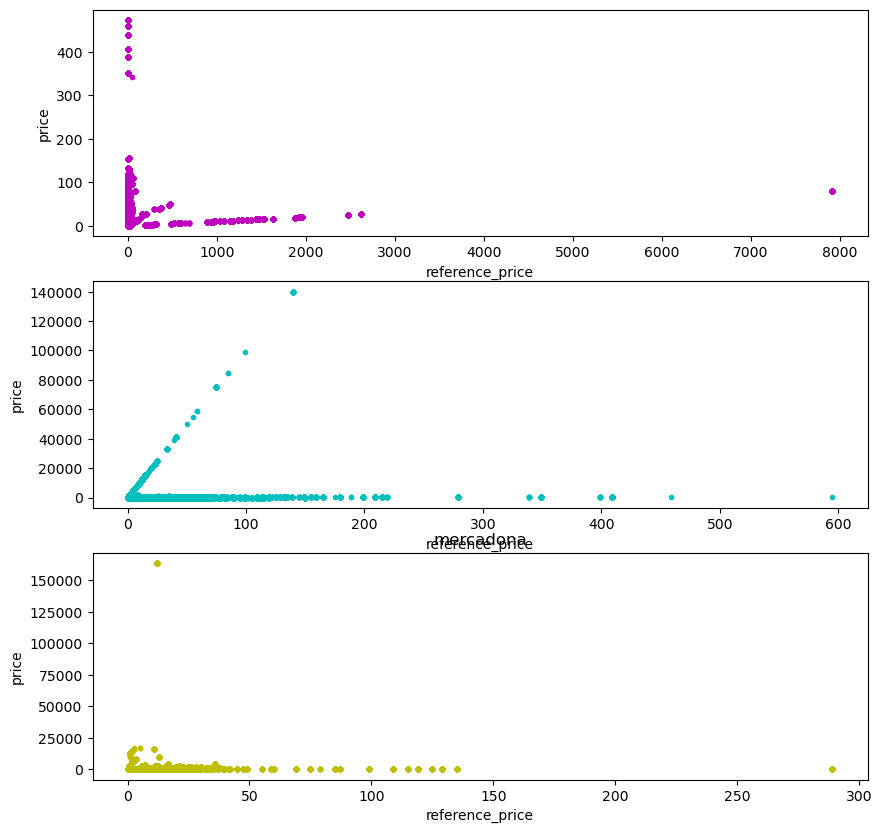

In [26]:
fig, ax=plt.subplots(3,figsize=(10,10))

ax[0].scatter(x =rd_filtro_m['price'],y=rd_filtro_m['reference_price'],color='m',marker=".")
ax[0].set_xlabel("reference_price")
ax[0].set_ylabel("price")
plt.title("mercadona")
plt.

ax[1].scatter(x =rd_filtro_c['price'],y=rd_filtro_c['reference_price'],color='c',marker=".")
ax[1].set_xlabel("reference_price")
ax[1].set_ylabel("price")


ax[2].scatter(x= rd_filtro_d['price'],y=rd_filtro_d['reference_price'],color='y',marker=".")
ax[2].set_xlabel("reference_price")
ax[2].set_ylabel("price")



plt.show()

## EXCLUIMOS LAS VENTAS A GRANEL DEL MERCADONA PARA TENER LAS METRICAS MAS COHERENTES

In [27]:


granel_m = rd_filtro_m[rd_filtro_m["description"]!="Granel"]
granel_m.sort_values(by="price",ascending=False, inplace=True)

C:\Users\gisel\AppData\Local\Temp\ipykernel_4124\278422766.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  granel_m.sort_values(by="price",ascending=False, inplace=True)


In [69]:
granel_m.head(3)

,category,name,description,price,reference_price,reference_unit,insert_date,product_id,id_reference_supermarket
6987749,charcuteria_y_quesos_jamon_serrano,Jamón de bellota ibérico 100% Campo Extremadura,Pieza,479.75,50.50,kg,2022-06-18,cedbc2de52a22b98dc25f28f37770b16,M1
7634023,charcuteria_y_quesos_jamon_serrano,Jamón de bellota ibérico 100% Campo Extremadura,Pieza,479.75,50.50,kg,2022-08-04,cedbc2de52a22b98dc25f28f37770b16,M1
7489243,charcuteria_y_quesos_jamon_serrano,Jamón de bellota ibérico 100% Campo Extremadura,Pieza,479.75,50.50,kg,2022-07-24,cedbc2de52a22b98dc25f28f37770b16,M1


In [29]:
#📌📌📌📌📌Agrupamos por supermercado y precio tomando en cuenta el precio que es el que mas coherencia tiene📌📌📌📌📌

In [29]:
agrupar = granel_m.groupby('id_reference_supermarket')['price']
agrupar

In [30]:
agrupar.mean()# Media de Mercadona sin ventas a granel    


id_reference_supermarket
M1   3.21
Name: price, dtype: float64

In [31]:
agrupar.median() # Mediana de Mercadona sin ventas a granel

id_reference_supermarket
M1   1.99
Name: price, dtype: float64

# Métricas con ventas a granel

### La media de los precios para MERCADONA es:  5.91
### La media de los precios para CARREFOUR es:  5.02
### La media de los precios para DIA es:        3.41
............................................................................................................................
### La mediana de los precios para MERCADONA es:  1.99
### La mediana de los precios para CARREFOUR es:  2.79
### La mediana de los precios para DIA es:        2.29

........................................................................................................................
## Observación sobre las métricas
* La media de los precios para Mercadona **CONTANDO** los productos con ventas a granel es de **5.91€**

* La media de los precios para Mercadona **SIN CONTAR** los productos con ventas a granel es de **3.21€**

* Sin embargo la mediana se mantiene igual para ambos casos, esto es debido a que la mediana excluye los outliers

* En los gráficos de dispersión también se observa los valores atípicos tanto en el Precio como el Precio de Referencia que observamos en los Dataframe. 

Esta diferencia se debe a que los precios de venta a granel son muy elevados, por ejemplo en el caso del **Jamón de bellota ibérico 100% Campo Extremadura**  de Mercadona que tiene un precio de **479.75€ LA PIEZA,** el consumidor suele comprar pequeñas cantidades en gramos,no es habitual que alguien compre una pieza completa de Jamón.

## FILTRADO POR PRECIO Y PRECIO REFERENCIA DE CARREFOUR Y DIA
 Para tener una comparativa con las mismas condiciones de las de Mercadona, se debe filtrar los productos con ventas a granel y obtener la media y mediana de Carrefour y DIA

In [35]:
#📍CARREFOUR
granel_c = rd_filtro_c[rd_filtro_c["description"]!="Granel"]
granel_c.sort_values(by="price",ascending=False, inplace=True)

In [36]:
granel_c.head(3)

,category,name,description,price,reference_price,reference_unit,insert_date,product_id,id_reference_supermarket
5114445,limpieza_y_hogar_bazar_barbacoas_y_accesorios,Barbacoa de Pellets - 130x55x120 Cm / 54 kg,NaN,595.00,595.00,ud,2022-02-09,07a4e9178ceb42cb5be73b99d19433ac,M2
5138241,limpieza_y_hogar_bazar_barbacoas_y_accesorios,Barbacoa Vertical con Chimena y Ladrillos Refr...,NaN,459.00,459.00,ud,2022-02-10,1fb6af387252cfee9a15c6e29a518d9f,M2
8191313,productos_frescos_charcuteria_jamon_serrano_e_...,Jamón de bellota ibérico 100% raza ibérica pie...,NaN,409.00,62.92,kg,2022-09-13,474f6f2fb3f25764a4f24b05bd480ce1,M2


In [37]:
agrupar2 = granel_c.groupby('id_reference_supermarket')['price']
agrupar2

In [38]:
agrupar2.mean()

id_reference_supermarket
M2   5.02
Name: price, dtype: float64

In [39]:
agrupar2.median()

id_reference_supermarket
M2   2.79
Name: price, dtype: float64

In [40]:
#📍 DIA
granel_d = rd_filtro_d[rd_filtro_d["description"]!="Granel"]
granel_d.sort_values(by="price",ascending=False, inplace=True)

In [41]:
granel_d.head(3)

,category,name,description,price,reference_price,reference_unit,insert_date,product_id,id_reference_supermarket
4282833,frescos_charcuteria_y_quesos_curados,NOBLEZA EXTREMEÑA jamón de bellota 100% Ibéric...,NaN,289.00,38.53,kg,2021-12-14,4c51d734b50c903bc2130e9ab8f5875d,M3
6303060,frescos_charcuteria_y_quesos_curados,NOBLEZA EXTREMEÑA jamón de bellota 100% ibéric...,NaN,289.00,38.53,kg,2022-05-02,4c51d734b50c903bc2130e9ab8f5875d,M3
5105945,frescos_charcuteria_y_quesos_curados,NOBLEZA EXTREMEÑA jamón de bellota 100% Ibéric...,NaN,289.00,38.53,kg,2022-02-08,4c51d734b50c903bc2130e9ab8f5875d,M3


In [46]:
agrupar3 = granel_d.groupby('id_reference_supermarket')['price']
agrupar3

In [47]:
agrupar3.mean()

id_reference_supermarket
M3   3.41
Name: price, dtype: float64

In [48]:
agrupar3.median()

id_reference_supermarket
M3   2.29
Name: price, dtype: float64

<BarContainer object of 3 artists>

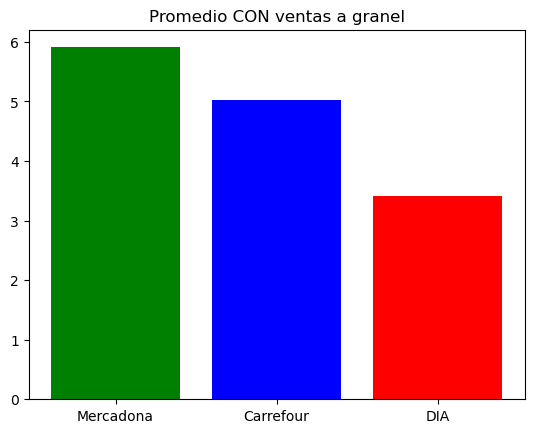

In [72]:
Media_con_granel= pd.DataFrame({"Media" : [5.91,5.02,3.41]},
index = ["Mercadona","Carrefour","DIA"])
total = Media_con_granel.sum(axis=1)
plt.title("Promedio CON ventas a granel")
plt.bar (total.index,total,color=["green","yellow","red"], label="media_sin_granel")

In [1]:
Media_sin_granel= pd.DataFrame({"Media Mercadona" : [5.02,3.41,3.21]},
index = ["Carrefour","DIA","Mercadona"])
total= Media_sin_granel.sum(axis=1)
plt.title("Promedio SIN ventas a granel")
plt.bar (total.index,total,color=["yellow","red","green"], label="media_sin_granel")

NameError: name 'pd' is not defined

# Respuesta PREGUNTA 2

### ARGUMENTO

* Se ha observado que *los Precios y los Precios de Referencia* de algunos productos en los tres supermercados no son correctos, por ello, se ha realizado un filtro en la base de datos para excluir los productos con ventas a granel con el fin de obtener la media de los productos de Mercadona con respecto a Carrefour y Dia con más coherencia y exactitud.

* Se ha corroborado la media de los productos a través de gráficas de dispersión, filtrado de datos y el cálculo de la mediana para cuantificar la variabilidad de los datos.

* Se ha calculado también la media y la mediana de Carrefour Y DIA para compararlas con las mismas restricciones de Mercadona y así tener una respuesta mas acertada.

* Se graficó la media **CON y SIN ventas a granel** de los tres supermercados para ver la variación.  


### CONCLUSIÓN

* Podemos concluir que la **Media** de los productos sin tomar en cuenta los productos con ventas a granel son:**Mercadona=  3.21€, Carrefour = 5.02€ y Dia = 3.41€** y la **Mediana: Mercadona= 1.99€, Carrefour = 2.79€ y Dia = 2.29€**

#### *Esto significa que no debemos tener en cuenta las ventas granel ya que perjudican los resultados y no nos arroja una media real de los precios.*

De esta manera podemos concluir que si tomamos en cuenta la **media** de los precios de los productos de Mercadona vemos que es inferior al resto de los demás supermercados, lo cual posiciona en primer lugar a **Mercadona con el promedio de precios mas bajo**. Para ser aun más precisos, si tomamos en cuenta la **mediana**, esta es más representativa, ya que nos brinda una mayor precision de los datos, teniendo **Mercadona 1.99€, Carrefour 2.79€ y DIA 2.29€** 
